In [96]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [9]:
# # Using the read_csv function and Path module, create a DataFrame by importing the draft-data-20-years.csv file
draft_df = pd.read_csv(Path('./draft-data-20-years.csv'),
                       index_col = 'DraftYear', 
                       parse_dates=False, 
                       infer_datetime_format=True
)

In [10]:
# Review the dataframe
draft_df.head()

,Unnamed: 0,DraftYr,Rk,Pk,Tm,Pos,Player,College,Contract Worth,Yrs,...,FT%,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,playerurl
DraftYear,,,,,,,,,,,,,,,,,,,,,
1990,1,1990,1,1,BRK,NaN,Derrick Coleman,Syracuse,NaN,15.0,...,0.769,64.3,0.119,1.4,22.3,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...
1990,2,1990,2,2,OKC,NaN,Gary Payton,Oregon State,NaN,17.0,...,0.729,145.5,0.148,3.3,62.5,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...
1990,3,1990,3,3,DEN,NaN,Mahmoud Abdul-Rauf,LSU,NaN,9.0,...,0.905,25.2,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...
1990,4,1990,4,4,ORL,NaN,Dennis Scott,Georgia Tech,NaN,10.0,...,0.793,33.4,0.089,0.2,9.9,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...
1990,5,1990,5,5,CHA,NaN,Kendall Gill,Illinois,NaN,15.0,...,0.754,47.8,0.078,0.1,15.8,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...


In [11]:
# Selecting columns from the dataframe for analysis
draft_df = draft_df[['Pk','Tm','Player','College','DraftYr','MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%', 'Contract Worth']]

In [12]:
# Filter dataframe to get most recent 5 years data
last_5_yrs_draft_df = draft_df.loc[draft_df['DraftYr'] >= 2017]

In [13]:
# Limit data on 1st round picks
last_5_yrs_1_rnd_draft_df = last_5_yrs_draft_df.loc[last_5_yrs_draft_df['Pk'] <=30]

In [14]:
# Creating a 'school' dataframe by selecting 'Pk' and 'College' columns
school = last_5_yrs_1_rnd_draft_df[['Pk','College']]

In [15]:
# Review school dataframe
school.head()

,Pk,College
DraftYear,,
2017,1,Washington
2017,2,UCLA
2017,3,Duke
2017,4,Kansas
2017,5,Kentucky


In [16]:
# Create a school_rookie_count series by selecting the 'College' column and counting how many times each school has appeared in the school dataframe
school_rookie_count = school[['College']].value_counts(sort=True, ascending=False)
# Change the series to dataframe and name the values 'Picks'(how many picks came from each school during 2017-2021)
school_rookie_count_df = school_rookie_count.to_frame(name='Picks')
# Review the school_rookie_count_df dataframe
school_rookie_count_df.head()

,Picks
College,
Kentucky,11
Duke,10
UNC,7
Florida State,5
Villanova,5


In [17]:
# Use hvplot to create bar visualization of school_rookie_count_df dataframe
school_rookie_count_df.hvplot.bar(
        title = 'Number Of NBA Picks From Each College 2017-2021',
        ylabel = 'Number of Picks',
        rot = 90,
        hover_color = 'orange'
)

:Bars   [College]   (Picks)

In [18]:
# Use hvplot to create scatter visualization of school dataframe, which shows the pick rank, number of picks from each college 2017-2021
school.hvplot.scatter(
    title='Drafted NBA Players Pick Number and Their Colleges 2017-2021',
    x='DraftYear',
    xlabel='Draft Year',
    ylabel='Pick number',
    groupby='College'
)

:DynamicMap   [College]
   :Scatter   [DraftYear]   (Pk)

In [19]:
# Display selected data in the dataframe
last_5_yrs_1_rnd_draft_df

,Pk,Tm,Player,College,DraftYr,MPG,PPG,RPG,APG,FG%,3P%,FT%,Contract Worth
DraftYear,,,,,,,,,,,,,
2017,1,PHI,Markelle Fultz,Washington,2017,25.6,10.9,3.3,4.6,0.447,0.265,0.695,33727701.0
2017,2,LAL,Lonzo Ball,UCLA,2017,32.5,11.9,5.7,6.2,0.400,0.364,0.578,30184438.0
2017,3,BOS,Jayson Tatum,Duke,2017,33.3,20.4,6.6,2.9,0.453,0.380,0.842,27118800.0
2017,4,PHO,Josh Jackson,Kansas,2017,23.6,11.5,4.1,1.9,0.417,0.293,0.679,24118800.0
2017,5,SAC,De'Aaron Fox,Kentucky,2017,31.8,18.7,3.5,6.2,0.459,0.317,0.725,22157109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,26,DEN,Bones Hyland,VCU,2021,18.0,8.8,2.7,2.0,0.369,0.346,0.881,10763119.0
2021,27,BRK,Cam Thomas,LSU,2021,19.6,9.8,2.6,1.3,0.445,0.273,0.808,10455512.0
2021,28,PHI,Jaden Springer,Tennessee,2021,3.0,1.0,1.0,0.0,1.000,NaN,NaN,10393940.0


In [20]:
# Select evaluation parameters for correlation datafram and convert it to correlation dataframe
corr_df = last_5_yrs_1_rnd_draft_df[['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%', 'Contract Worth']].corr()
# Review the correlation dataframe
corr_df.head()

,MPG,PPG,RPG,APG,FG%,3P%,FT%,Contract Worth
MPG,1.000000,0.888233,0.639041,0.701885,-0.070778,0.208495,0.382971,0.530408
PPG,0.888233,1.000000,0.610588,0.736819,0.037639,0.230109,0.360729,0.564328
RPG,0.639041,0.610588,1.000000,0.310486,0.303311,-0.131163,0.011107,0.419323
APG,0.701885,0.736819,0.310486,1.000000,-0.148449,0.142334,0.279688,0.444316
FG%,-0.070778,0.037639,0.303311,-0.148449,1.000000,-0.142753,-0.326683,0.019353


<AxesSubplot:>

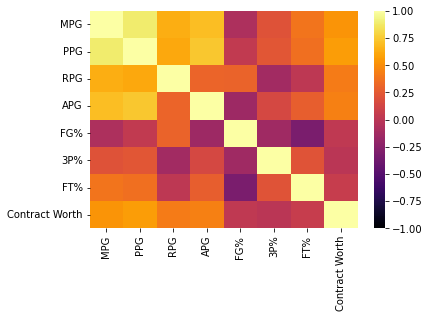

In [21]:
# Use Seaborn heatmap to visualize the correlations of each parameter with Contract Worth
sns.heatmap(corr_df, vmin = -1, vmax=1, cmap='inferno')

### Discover that FG%, 3P%, and FT% are more correlated to players contract worth than other parameters. Also proves, in reality, the more points a player can score for a team the better.

In [22]:
# Filter the last_5_yrs_1_rnd_draft_df dataframe to get top 5 picks (Pick number 1-5) data of each year (2017-2021) and save as group_a_df
group_a_df = last_5_yrs_1_rnd_draft_df.loc[last_5_yrs_1_rnd_draft_df['Pk'] <=5]
# Review group A dataframe
group_a_df.head()

,Pk,Tm,Player,College,DraftYr,MPG,PPG,RPG,APG,FG%,3P%,FT%,Contract Worth
DraftYear,,,,,,,,,,,,,
2017,1,PHI,Markelle Fultz,Washington,2017,25.6,10.9,3.3,4.6,0.447,0.265,0.695,33727701.0
2017,2,LAL,Lonzo Ball,UCLA,2017,32.5,11.9,5.7,6.2,0.400,0.364,0.578,30184438.0
2017,3,BOS,Jayson Tatum,Duke,2017,33.3,20.4,6.6,2.9,0.453,0.380,0.842,27118800.0
2017,4,PHO,Josh Jackson,Kansas,2017,23.6,11.5,4.1,1.9,0.417,0.293,0.679,24118800.0
2017,5,SAC,De'Aaron Fox,Kentucky,2017,31.8,18.7,3.5,6.2,0.459,0.317,0.725,22157109.0


In [23]:
# Filter the last_5_yrs_1_rnd_draft_df dataframe to get middle 5 picks (Pick number 13-17) data of each year (2017-2021) and save as group_b_df
group_b_df = last_5_yrs_1_rnd_draft_df.loc[(last_5_yrs_1_rnd_draft_df['Pk'] >=13) & (last_5_yrs_1_rnd_draft_df['Pk'] <=17)]

In [24]:
# Filter the last_5_yrs_1_rnd_draft_df dataframe to get last 5 picks (Pick number 26-30) data of each year (2017-2021) and save as group_c_df
group_c_df = last_5_yrs_1_rnd_draft_df.loc[last_5_yrs_1_rnd_draft_df['Pk'] >=26]

In [25]:
# Select group A MPG data: rename the column and save it into a new dataframe
group_a_mpg = pd.DataFrame(group_a_df[['MPG']])
group_a_mpg.rename(columns = {'MPG': 'Group A MPG'}, inplace = True)
# Review group A MPG dataframe
group_a_mpg.head()

,Group A MPG
DraftYear,
2017,25.6
2017,32.5
2017,33.3
2017,23.6
2017,31.8


In [26]:
# Select group B MPG data: rename the column and save it into a new dataframe
group_b_mpg = pd.DataFrame(group_b_df[['MPG']])
group_b_mpg.rename(columns = {'MPG': 'Group B MPG'}, inplace = True)

# # Select group C MPG data: rename the column and save it into a new dataframe
group_c_mpg = pd.DataFrame(group_c_df[['MPG']])
group_c_mpg.rename(columns = {'MPG': 'Group C MPG'}, inplace = True)

In [27]:
# Concat 3 groups MPG dataframes and save it as all_goup_mpg_df
all_groups_mpg = [group_a_mpg, group_b_mpg, group_c_mpg]
all_group_mpg_df = pd.concat(all_groups_mpg, axis = 1)
# Review the dataframe
all_group_mpg_df.head()

,Group A MPG,Group B MPG,Group C MPG
DraftYear,,,
2017,25.6,33.7,8.7
2017,32.5,28.0,30.3
2017,33.3,18.7,12.2
2017,23.6,13.5,25.8
2017,31.8,12.4,27.1


In [28]:
# Get a summary of all groups MPG data
all_group_mpg_df.describe()

,Group A MPG,Group B MPG,Group C MPG
count,25.000000,25.000000,25.000000
mean,30.440000,19.876000,17.516000
std,3.564875,6.696969,7.851416
min,21.400000,9.500000,3.000000
25%,28.200000,14.200000,10.700000
50%,31.700000,19.200000,17.800000
75%,33.000000,24.500000,25.100000
max,35.400000,33.700000,30.300000


<AxesSubplot:>

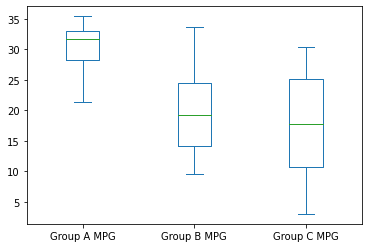

In [29]:
# Visualize all groups MPG data using box plot
all_group_mpg_df.plot.box()

In [30]:
# Select group A PPG data: rename the column and save it into a new dataframe
group_a_ppg = pd.DataFrame(group_a_df[['PPG']])
group_a_ppg.rename(columns = {'PPG': 'Group A PPG'}, inplace = True)
# Select group B PPG data: rename the column and save it into a new dataframe
group_b_ppg = pd.DataFrame(group_b_df[['PPG']])
group_b_ppg.rename(columns = {'PPG': 'Group B PPG'}, inplace = True)
# Select group C PPG data: rename the column and save it into a new dataframe
group_c_ppg = pd.DataFrame(group_c_df[['PPG']])
group_c_ppg.rename(columns = {'PPG': 'Group C PPG'}, inplace = True)

In [31]:
# Concat 3 groups PPG dataframes and save it as all_goup_ppg_df
all_groups_ppg = [group_a_ppg, group_b_ppg, group_c_ppg]
all_group_ppg_df = pd.concat(all_groups_ppg, axis = 1)
# Review the dataframe
all_group_ppg_df.head()

,Group A PPG,Group B PPG,Group C PPG
DraftYear,,,
2017,10.9,23.7,2.3
2017,11.9,13.0,15.4
2017,20.4,6.5,4.8
2017,11.5,3.9,11.6
2017,18.7,4.4,9.5


In [32]:
# Get a summary of all groups PPG data
all_group_ppg_df.describe()

,Group A PPG,Group B PPG,Group C PPG
count,25.000000,25.00000,25.000000
mean,16.096000,8.35600,7.328000
std,4.796047,5.02652,4.087126
min,9.100000,3.20000,1.000000
25%,12.600000,4.40000,3.800000
50%,15.700000,6.80000,6.800000
75%,18.700000,9.80000,9.800000
max,26.000000,23.70000,15.400000


<AxesSubplot:>

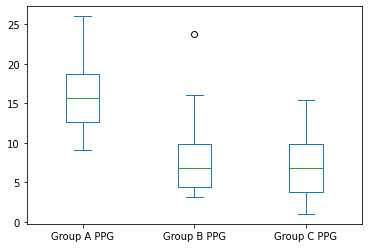

In [33]:
# Visualize all groups PPG data using box plot
all_group_ppg_df.plot.box()

In [34]:
# Select group A RPG data: rename the column and save it into a new dataframe
group_a_rpg = pd.DataFrame(group_a_df[['RPG']])
group_a_rpg.rename(columns = {'RPG': 'Group A RPG'}, inplace = True)
# Select group B RPG data: rename the column and save it into a new dataframe
group_b_rpg = pd.DataFrame(group_b_df[['RPG']])
group_b_rpg.rename(columns = {'RPG': 'Group B RPG'}, inplace = True)
# Select group C RPG data: rename the column and save it into a new dataframe
group_c_rpg = pd.DataFrame(group_c_df[['RPG']])
group_c_rpg.rename(columns = {'RPG': 'Group C RPG'}, inplace = True)

In [35]:
# Concat 3 groups RPG dataframes and save it as all_goup_rpg_df
all_groups_rpg = [group_a_rpg, group_b_rpg, group_c_rpg]
all_group_rpg_df = pd.concat(all_groups_rpg, axis = 1)
# Review the dataframe
all_group_rpg_df.head()

,Group A RPG,Group B RPG,Group C RPG
DraftYear,,,
2017,3.3,4.2,2.9
2017,5.7,8.2,6.2
2017,6.6,2.5,4.5
2017,4.1,2.7,3.3
2017,3.5,3.1,5.8


In [36]:
# Get a summary of all groups RPG data
all_group_rpg_df.describe()

,Group A RPG,Group B RPG,Group C RPG
count,25.000000,25.000000,25.000000
mean,5.388000,3.624000,3.264000
std,1.990042,1.833776,1.608799
min,2.500000,1.200000,1.000000
25%,3.900000,2.300000,2.000000
50%,5.100000,3.100000,2.700000
75%,6.600000,4.600000,4.300000
max,10.600000,8.200000,6.400000


<AxesSubplot:>

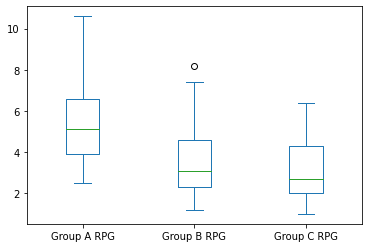

In [37]:
# Visualize all groups RPG data using box plot
all_group_rpg_df.plot.box()

In [38]:
# Select group A APG data: rename the column and save it into a new dataframe
group_a_apg = pd.DataFrame(group_a_df[['APG']])
group_a_apg.rename(columns = {'APG': 'Group A APG'}, inplace = True)
# Select group B APG data: rename the column and save it into a new dataframe
group_b_apg = pd.DataFrame(group_b_df[['APG']])
group_b_apg.rename(columns = {'APG': 'Group B APG'}, inplace = True)
# Select group C APG data: rename the column and save it into a new dataframe
group_c_apg = pd.DataFrame(group_c_df[['APG']])
group_c_apg.rename(columns = {'APG': 'Group C APG'}, inplace = True)

In [39]:
# Concat 3 groups APG dataframes and save it as all_goup_apg_df
all_groups_apg = [group_a_apg, group_b_apg, group_c_apg]
all_group_apg_df = pd.concat(all_groups_apg, axis = 1)
# Review the dataframe
all_group_apg_df.head()

,Group A APG,Group B APG,Group C APG
DraftYear,,,
2017,4.6,4.4,0.7
2017,6.2,3.5,2.1
2017,2.9,1.1,0.5
2017,1.9,0.9,3.9
2017,6.2,0.7,2.0


In [40]:
# Get a summary of all groups APG data
all_group_apg_df.describe()

,Group A APG,Group B APG,Group C APG
count,25.00000,25.000000,25.000000
mean,3.79200,1.724000,1.464000
std,2.38431,1.246756,1.089296
min,0.70000,0.300000,0.000000
25%,1.90000,0.900000,0.700000
50%,3.20000,1.200000,1.300000
75%,5.80000,2.300000,2.000000
max,8.90000,5.000000,4.500000


<AxesSubplot:>

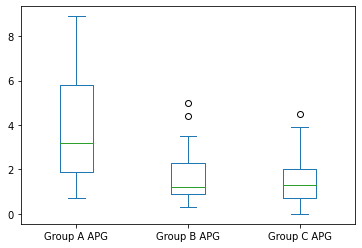

In [41]:
# Visualize all groups APG data using box plot
all_group_apg_df.plot.box()

In [42]:
# Select group A contract worth data: rename the column and save it into a new dataframe
group_a_contract = pd.DataFrame(group_a_df[['Contract Worth']])
group_a_contract.rename(columns = {'Contract Worth': 'Group A Contract Worth'}, inplace = True)
# Select group B contract worth data: rename the column and save it into a new dataframe
group_b_contract = pd.DataFrame(group_b_df[['Contract Worth']])
group_b_contract.rename(columns = {'Contract Worth': 'Group B Contract Worth'}, inplace = True)
# Select group C contract worth data: rename the column and save it into a new dataframe
group_c_contract = pd.DataFrame(group_c_df[['Contract Worth']])
group_c_contract.rename(columns = {'Contract Worth': 'Group C Contract Worth'}, inplace = True)

In [43]:
# Concat 3 groups contract worth dataframes and save it as all_goup_contract_df
all_groups_contract = [group_a_contract, group_b_contract, group_c_contract]
all_group_contract_df = pd.concat(all_groups_contract, axis = 1)
# Review the dataframe
all_group_contract_df.head()

,Group A Contract Worth,Group B Contract Worth,Group C Contract Worth
DraftYear,,,
2017,33727701.0,13092144.0,7955043.0
2017,30184438.0,12587510.0,7727382.0
2017,27118800.0,12098915.0,7681457.0
2017,24118800.0,11497652.0,7625397.0
2017,22157109.0,10927154.0,7570779.0


In [44]:
# Get a summary of all groups contract worth data
all_group_contract_df.describe()

,Group A Contract Worth,Group B Contract Worth,Group C Contract Worth
count,2.500000e+01,2.500000e+01,2.500000e+01
mean,3.398147e+07,1.487708e+07,9.457335e+06
std,6.343022e+06,1.853445e+06,1.065834e+06
min,2.215711e+07,1.092715e+07,7.570779e+06
25%,2.928044e+07,1.379106e+07,9.095405e+06
50%,3.306463e+07,1.509819e+07,1.001738e+07
75%,3.961984e+07,1.636453e+07,1.024349e+07
max,4.559882e+07,1.770436e+07,1.076312e+07


<AxesSubplot:>

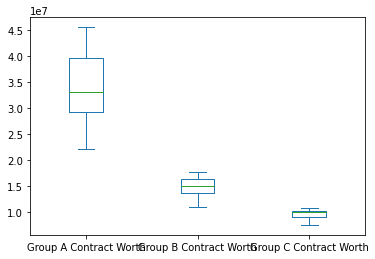

In [45]:
# Visualize all groups contract worth data using box plot
all_group_contract_df.plot.box()

In [46]:
# Calculate averages of each category for top 5 picks of each year and save to group_a_ave dataframe
group_a_ave=group_a_df.groupby('DraftYear').mean().sort_values('DraftYear')
# Review group_a_ave dataframe
group_a_ave

,Pk,DraftYr,MPG,PPG,RPG,APG,FG%,3P%,FT%,Contract Worth
DraftYear,,,,,,,,,,
2017,3.0,2017.0,29.36,14.68,4.64,4.36,0.4352,0.3238,0.7038,27461369.6
2018,3.0,2018.0,29.96,19.24,7.10,4.10,0.4876,0.3062,0.7594,32958521.2
2019,3.0,2019.0,32.08,18.46,4.74,4.14,0.4752,0.3498,0.7554,36134441.6
2020,3.0,2020.0,28.82,13.66,4.90,2.80,0.4588,0.3426,0.7394,36134441.6
2021,3.0,2021.0,31.98,14.44,5.56,3.56,0.4242,0.2888,0.7710,37218566.2


In [105]:
group_a_mean = group_a_ave[['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']].mean()

In [106]:
group_a_mean_df = group_a_mean.to_frame(name='mean')
group_a_mean_df

,mean
MPG,30.44000
PPG,16.09600
RPG,5.38800
APG,3.79200
FG%,0.45620
3P%,0.32224
FT%,0.74580


In [87]:
# Calculate averages of each category for middle 5 picks of each year and save to group_b_ave dataframe
group_b_ave=group_b_df.groupby('DraftYear').mean().sort_values('DraftYear')

In [94]:
group_b_mean = group_b_ave[['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']].mean()
group_b_mean_df = group_b_mean.to_frame(name='mean')
group_b_mean_df

,mean
MPG,19.87600
PPG,8.35600
RPG,3.62400
APG,1.72400
FG%,0.42012
3P%,0.31248
FT%,0.75964


In [92]:
# Calculate averages of each category for last 5 picks of each year and save to group_c_ave dataframe
group_c_ave=group_c_df.groupby('DraftYear').mean().sort_values('DraftYear')

In [95]:
group_c_mean = group_c_ave[['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']].mean()
group_c_mean_df = group_c_mean.to_frame(name='mean')
group_c_mean_df

,mean
MPG,17.51600
PPG,7.32800
RPG,3.26400
APG,1.46400
FG%,0.47868
3P%,0.30622
FT%,0.75349


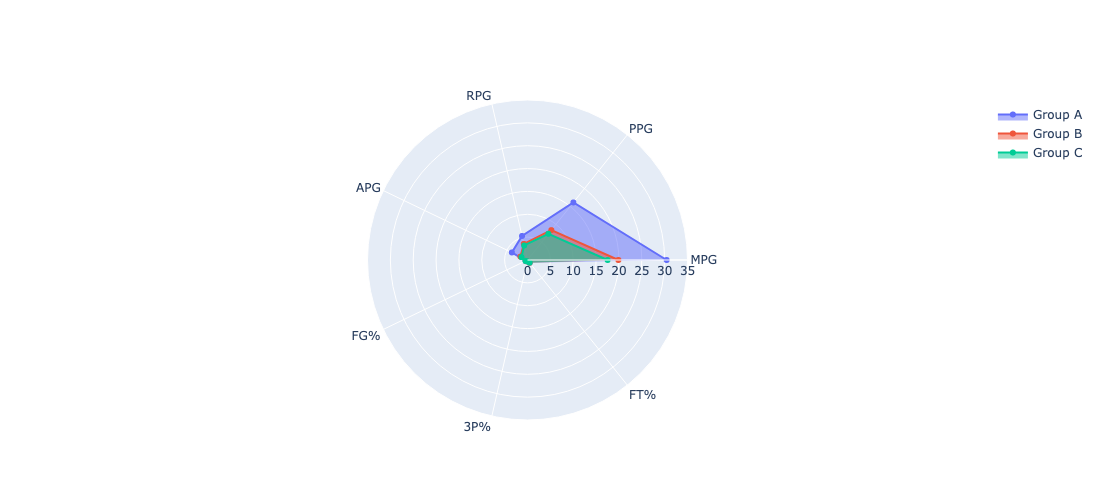

In [113]:
categories = ['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = [30.44, 16.10, 5.39, 3.80,0.46,0.32,0.75],
    theta = categories,
    fill='toself',
    name= 'Group A'
))

fig.add_trace(go.Scatterpolar(
    r = [19.88,8.36,3.62,1.72,0.42,0.31,0.76],
    theta = categories,
    fill='toself',
    name= 'Group B'
))

fig.add_trace(go.Scatterpolar(
    r = [17.52,7.33,3.26,1.46,0.48,0.30,0.75],
    theta = categories,
    fill='toself',
    name= 'Group C'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0,35]
        )),
    showlegend=True,
    width = 500,
    height = 500
)
    
fig.show()

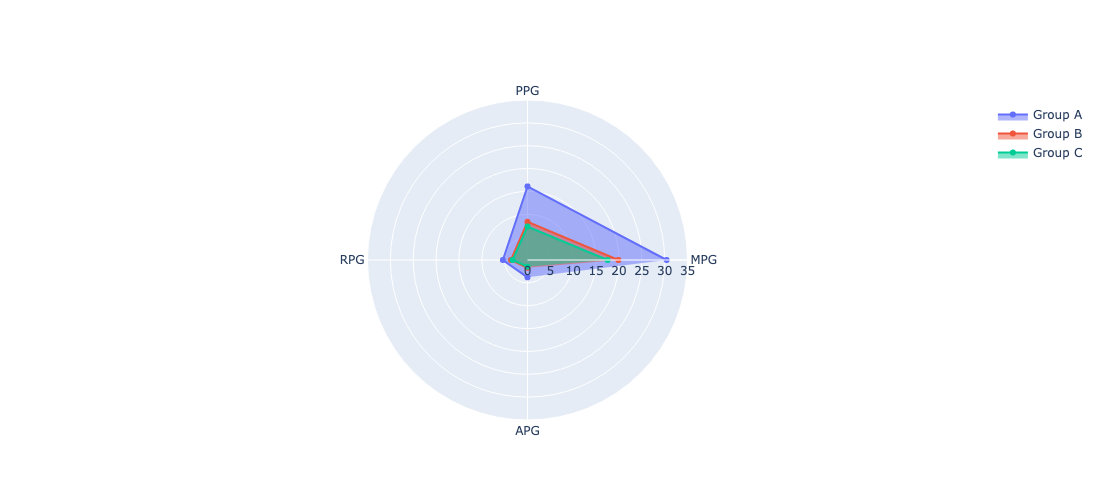

In [111]:
pg_categories = ['MPG','PPG', 'RPG', 'APG']
pg_fig = go.Figure()
pg_fig.add_trace(go.Scatterpolar(
    r = [30.44, 16.10, 5.39, 3.80],
    theta = pg_categories,
    fill='toself',
    name= 'Group A'
))

pg_fig.add_trace(go.Scatterpolar(
    r = [19.88,8.36,3.62,1.72],
    theta = pg_categories,
    fill='toself',
    name= 'Group B'
))

pg_fig.add_trace(go.Scatterpolar(
    r = [17.52,7.33,3.26,1.46],
    theta = pg_categories,
    fill='toself',
    name= 'Group C'
))

pg_fig.update_layout(
    polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0,35]
        )),
    showlegend=True,
    width = 500,
    height = 500
)
    
pg_fig.show()

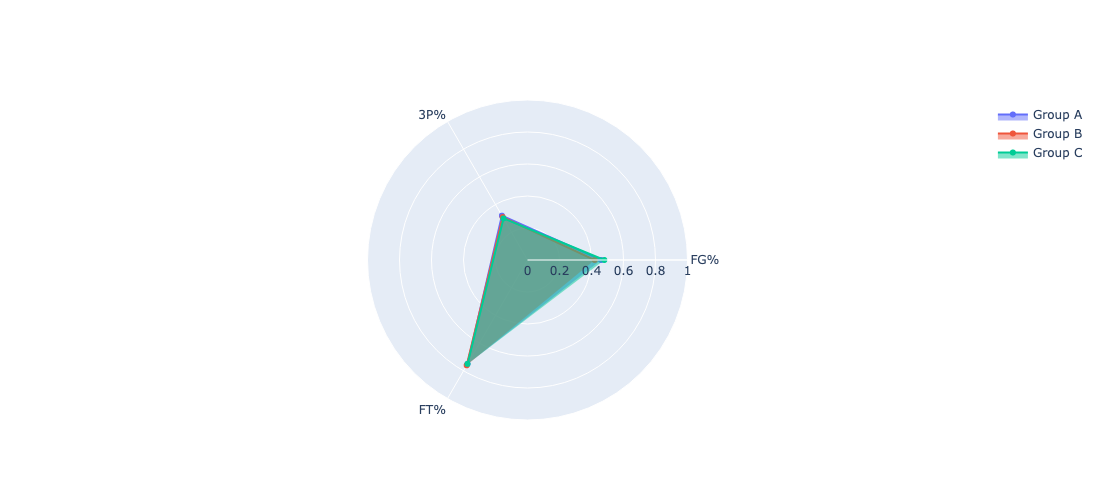

In [112]:
shooting_categories = ['FG%', '3P%','FT%']
shooting_fig = go.Figure()
shooting_fig.add_trace(go.Scatterpolar(
    r = [0.46,0.32,0.75],
    theta = shooting_categories,
    fill='toself',
    name= 'Group A'
))

shooting_fig.add_trace(go.Scatterpolar(
    r = [0.42,0.31,0.76],
    theta = shooting_categories,
    fill='toself',
    name= 'Group B'
))

shooting_fig.add_trace(go.Scatterpolar(
    r = [0.48,0.30,0.75],
    theta = shooting_categories,
    fill='toself',
    name= 'Group C'
))

shooting_fig.update_layout(
    polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0,1]
        )),
    showlegend=True,
    width = 500,
    height = 500
)
    
shooting_fig.show()

In [53]:
# Use hvplot to visualize group A's minutes per game played 2017-2021
group_a_mpg_plot = group_a_ave['MPG'].hvplot(
    title='Average 1st Round Picks Minutes Per Game Played 2017-2021',
    x='DraftYear',
    y='MPG',
    xlabel='Draft Year',
    ylabel='Munites Per Game',
    label='Group-A'
)

In [54]:
# Use hvplot to visualize group B's minutes per game played 2017-2021
group_b_mpg_plot = group_b_ave['MPG'].hvplot(
    title='Average 1st Round Picks Minutes Per Game Played 2017-2021',
    x='DraftYear',
    y='MPG',
    xlabel='Draft Year',
    ylabel='Munites Per Game',
    label='Group-B'
)

In [55]:
# Use hvplot to visualize group C's minutes per game played 2017-2021
group_c_mpg_plot = group_c_ave['MPG'].hvplot(
    title='Average 1st Round Picks Minutes Per Game Played 2017-2021',
    x='DraftYear',
    y='MPG',
    xlabel='Draft Year',
    ylabel='Munites Per Game',
    label='Group-C'
)

In [56]:
# Overlay all groups minutes per game played 2017-2021
all_groups_mpg_plot = group_a_mpg_plot *group_b_mpg_plot * group_c_mpg_plot 
all_groups_mpg_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (MPG)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (MPG)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (MPG)

In [57]:
# Use hvplot to visualize group A's points per game 2017-2021
group_a_ppg_plot = group_a_ave['PPG'].hvplot(
    title='Average 1st Round Picks Points Per Game 2017-2021',
    x='DraftYear',
    y='PPG',
    xlabel='Draft Year',
    ylabel='Points Per Game',
    label='Group-A'
)

In [58]:
# Use hvplot to visualize group B's points per game 2017-2021
group_b_ppg_plot = group_b_ave['PPG'].hvplot(
    title='Average 1st Round Picks Points Per Game 2017-2021',
    x='DraftYear',
    y='PPG',
    xlabel='Draft Year',
    ylabel='Points Per Game',
    label='Group-B'
)

In [59]:
# Use hvplot to visualize group C's points per game 2017-2021
group_c_ppg_plot = group_c_ave['PPG'].hvplot(
    title='Average 1st Round Picks Points Per Game 2017-2021',
    x='DraftYear',
    y='PPG',
    xlabel='Draft Year',
    ylabel='Points Per Game',
    label='Group-C'
)

In [60]:
# Overlay all groups points per game 2017-2021
all_group_ppg_plot = group_a_ppg_plot * group_b_ppg_plot * group_c_ppg_plot
all_group_ppg_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (PPG)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (PPG)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (PPG)

In [61]:
# Use hvplot to visualize group A's rebounds per game 2017-2021
group_a_rpg_plot = group_a_ave['RPG'].hvplot(
    title='Average 1st Round Picks Rebounds Per Game 2017-2021',
    x='DraftYear',
    y='RPG',
    xlabel='Draft Year',
    ylabel='Rebounds Per Game',
    label='Group-A'
)

In [62]:
# Use hvplot to visualize group B's rebounds per game 2017-2021
group_b_rpg_plot = group_b_ave['RPG'].hvplot(
    title='Average 1st Round Picks Rebounds Per Game 2017-2021',
    x='DraftYear',
    y='RPG',
    xlabel='Draft Year',
    ylabel='Rebounds Per Game',
    label='Group-B'
)

In [63]:
# Use hvplot to visualize group C's rebounds per game 2017-2021
group_c_rpg_plot = group_c_ave['RPG'].hvplot(
    title='Average 1st Round Picks Rebounds Per Game 2017-2021',
    x='DraftYear',
    y='RPG',
    xlabel='Draft Year',
    ylabel='Rebounds Per Game',
    label='Group-C'
)

In [64]:
# Overlay all groups rebounds per game 2017-2021
group_a_rpg_plot * group_b_rpg_plot * group_c_rpg_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (RPG)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (RPG)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (RPG)

In [65]:
# Use hvplot to visualize group A's assists per game 2017-2021
group_a_apg_plot = group_a_ave['APG'].hvplot(
    title='Average 1st Round Picks Assists Per Game 2017-2021',
    x='DraftYear',
    y='APG',
    xlabel='Draft Year',
    ylabel='Assists Per Game',
    label='Group-A'
)

In [66]:
# Use hvplot to visualize group B's assists per game 2017-2021
group_b_apg_plot = group_b_ave['APG'].hvplot(
    title='Average 1st Round Picks Assists Per Game 2017-2021',
    x='DraftYear',
    y='APG',
    xlabel='Draft Year',
    ylabel='Assists Per Game',
    label='Group-B'
)

In [67]:
# Use hvplot to visualize group C's assists per game 2017-2021
group_c_apg_plot = group_c_ave['APG'].hvplot(
    title='Average 1st Round Picks Assists Per Game 2017-2021',
    x='DraftYear',
    y='APG',
    xlabel='Draft Year',
    ylabel='Assists Per Game',
    label='Group-C'
)

In [68]:
# Overlay all groups assists per game 2017-2021
group_a_apg_plot * group_b_apg_plot * group_c_apg_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (APG)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (APG)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (APG)

In [69]:
# Use hvplot to visualize group A's field goal percentage 2017-2021
group_a_fg_plot = group_a_ave['FG%'].hvplot(
    title='Average 1st Round Picks Field Goal Percentage 2017-2021',
    x='DraftYear',
    y='FG%',
    xlabel='Draft Year',
    ylabel='Field Goal Percentage',
    label='Group-A'
)

In [70]:
# Use hvplot to visualize group B's field goal percentage 2017-2021
group_b_fg_plot = group_b_ave['FG%'].hvplot(
    title='Average 1st Round Picks Field Goal Percentage 2017-2021',
    x='DraftYear',
    y='FG%',
    xlabel='Draft Year',
    ylabel='Field Goal Percentage',
    label='Group-B'
)

In [71]:
# Use hvplot to visualize group C's field goal percentage 2017-2021
group_c_fg_plot = group_c_ave['FG%'].hvplot(
    title='Average 1st Round Picks Field Goal Percentage 2017-2021',
    x='DraftYear',
    y='FG%',
    xlabel='Draft Year',
    ylabel='Field Goal Percentage',
    label='Group-C'
)

In [72]:
# Overlay all groups field goal percentage 2017-2021
group_a_fg_plot*group_b_fg_plot*group_c_fg_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (FG%)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (FG%)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (FG%)

In [73]:
# Use hvplot to visualize group A's 3-pointer percentage 2017-2021
group_a_3p_plot = group_a_ave['3P%'].hvplot(
    title='Average 1st Round Picks 3-Pointer Percentage 2017-2021',
    x='DraftYear',
    y='3P%',
    xlabel='Draft Year',
    ylabel='3_Pointer Percentage',
    label='Group-A'
)

In [74]:
# Use hvplot to visualize group B's 3-pointer percentage 2017-2021
group_b_3p_plot = group_b_ave['3P%'].hvplot(
    title='Average 1st Round Picks 3-Pointer Percentage 2017-2021',
    x='DraftYear',
    y='3P%',
    xlabel='Draft Year',
    ylabel='3_Pointer Percentage',
    label='Group-B'
)

In [75]:
# Use hvplot to visualize group C's 3-pointer percentage 2017-2021
group_c_3p_plot = group_c_ave['3P%'].hvplot(
    title='Average 1st Round Picks 3-Pointer Percentage 2017-2021',
    x='DraftYear',
    y='3P%',
    xlabel='Draft Year',
    ylabel='3_Pointer Percentage',
    label='Group-C'
)

In [76]:
# Overlay all groups 3-pinter percentage 2017-2021
group_a_3p_plot*group_b_3p_plot*group_c_3p_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (3P%)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (3P%)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (3P%)

In [77]:
# Use hvplot to visualize group A's free throws percentage 2017-2021
group_a_ft_plot = group_a_ave['FT%'].hvplot(
    title='Average 1st Round Picks Free Throws Percentage 2017-2021',
    x='DraftYear',
    y='FT%',
    xlabel='Draft Year',
    ylabel='Free Throws Percentage',
    label='Group-A'
)

In [78]:
# Use hvplot to visualize group B's free throws percentage 2017-2021
group_b_ft_plot = group_b_ave['FT%'].hvplot(
    title='Average 1st Round Picks Free Throws Percentage 2017-2021',
    x='DraftYear',
    y='FT%',
    xlabel='Draft Year',
    ylabel='Free Throws Percentage',
    label='Group-B'
)

In [79]:
# Use hvplot to visualize group C's free throws percentage 2017-2021
group_c_ft_plot = group_c_ave['FT%'].hvplot(
    title='Average 1st Round Picks Free Throws Percentage 2017-2021',
    x='DraftYear',
    y='FT%',
    xlabel='Draft Year',
    ylabel='Free Throws Percentage',
    label='Group-C'
)

In [80]:
# Overlay all groups free throws percentage 2017-2021
group_a_ft_plot*group_b_ft_plot*group_c_ft_plot

:Overlay
   .Curve.Group_hyphen_minus_A :Curve   [DraftYear]   (FT%)
   .Curve.Group_hyphen_minus_B :Curve   [DraftYear]   (FT%)
   .Curve.Group_hyphen_minus_C :Curve   [DraftYear]   (FT%)

### When looking at MPG, PPG, RPG, and APG graphs, Group A has the best numbers followed by Group B and C, which implies an easy trend to follow; while when it comes to FG%, 3P%, and FT%, Group B and C seems have better numbers, which is hard to discover any trend.

### Kentucky, Duke, and UNC have highest number of athletes got drafted. However, picks came from these schools are ranking lower each year in the draft